## Imports

In [1]:
import re
import signal
import time
from matplotlib import pyplot as plt
from os import path

import numpy as np
import pexpect
from pexpect import popen_spawn
from tqdm.notebook import tnrange, tqdm

## Params and constants

In [2]:
SOLVER_PATH = "C:/PioSOLVER/PioSOLVER2-pro.exe"
SCRIPT_PATH = "C:/Users/Christopher/Documents/autosim/testscript.txt"

## Helper methods

In [3]:
def read_before(proc):
    return proc.before.decode().strip()
    

def print_before(proc):
    print(read_before(proc))

    
def clear_output_buffer(proc, timeout=1):
    """Clear the buffer for proc.readlines."""
    while proc.expect([".+", pexpect.TIMEOUT], timeout=timeout) == 0:
        pass

## Main

In [4]:
proc = popen_spawn.PopenSpawn(SOLVER_PATH, cwd=path.dirname(SOLVER_PATH))
proc.expect("\r\n\r\n")  # sent by the solver process after starting
print_before(proc)

PioSOLVER-pro 2.0.5 (Apr 21 2021, 15:34:41)
(c) Piotr Lopusiewicz
registered to gittermanh@gmail.com


In [5]:
proc.sendline("set_end_string END")
proc.expect("END")
print_before(proc)

set_end_string ok!


In [6]:
proc.sendline("is_ready")
proc.expect("END")
print_before(proc)

is_ready ok!


In [7]:
proc.sendline(f"load_script_silent {SCRIPT_PATH}")
proc.expect("END")
print_before(proc)

reset_tree_info ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
add_info_line ok!
set_algorithm ok!
set_threads ok!
set_accuracy ok!
set_range ok!
set_range ok!
set_board ok!
set_eff_stack ok!
set_isomorphism ok!
set_pot ok!
clear_lines ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!
add_line ok!

In [8]:
proc.sendline("build_tree")
proc.expect("END")
print_before(proc)

build_tree ok!


In [9]:
script = \
""" 
skip_if_done "Saves/2021-04-28_21-56-35_b30simple_btnvsco/Js5h4s.cfr" next
go 600 seconds
wait_for_solver 
dump_tree "Saves/2021-04-28_21-56-35_b30simple_btnvsco/Js5h4s.cfr" no_rivers
LABEL: next
echo  "1 out of 1 done"
solver_time 
echo "Script has completed. You can close this window. Result files are in Saves\2021-04-28_21-56-35_b30simple_btnvsco directory"
"""

In [10]:
clear_output_buffer(proc)
for line in script.split("\n"):
    print(line)
    proc.sendline(line)
    proc.expect("END")
    print_before(proc)

TIMEOUT: <pexpect.popen_spawn.PopenSpawn object at 0x000001D5061AC070>
searcher: searcher_re:
    0: re.compile(b'END')
<pexpect.popen_spawn.PopenSpawn object at 0x000001D5061AC070>
searcher: searcher_re:
    0: re.compile(b'END')

In [35]:
print_before(proc)

In [ ]:
times = []
oop_evs = []
ip_evs = []
nash_deltas = []
for i in tnrange(50):
    t_start = time.time()

    proc.sendline("go 1 steps")
    proc.expect("SOLVER: stopped \(.*\)")

    proc.sendline("calc_results")
    proc.expect("END");
    res = proc.before.decode().strip()

    res_oop_ev = re.search("EV OOP.*", res).group()
    oop_ev = float(re.search("\d+\.\d+", res_oop_ev).group())
    oop_evs.append(oop_ev)
    
    res_ip_ev = re.search("EV IP.*", res).group()
    ip_ev = float(re.search("\d+\.\d+", res_ip_ev).group())
    ip_evs.append(ip_ev)
    
    res_nash_delta = re.search("Exploitable for.*", res).group()
    nash_delta = float(re.search("\d+\.\d+", res_nash_delta).group())
    nash_deltas.append(nash_delta)

    t_delta = time.time() - t_start
    times.append(t_delta)

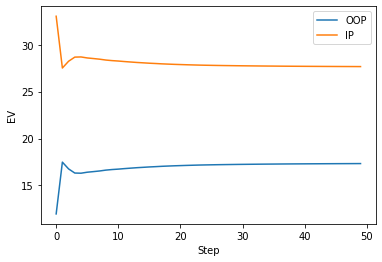

In [85]:
plt.plot(oop_evs, label="OOP")
plt.plot(ip_evs, label="IP")
plt.xlabel("Step")
plt.ylabel("EV")
plt.legend()
plt.show()

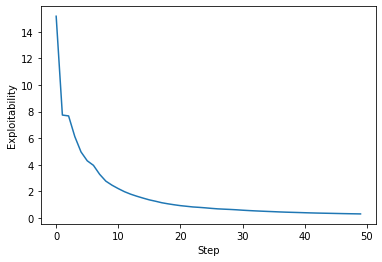

In [77]:
plt.plot(nash_deltas)
plt.xlabel("Step")
plt.ylabel("Exploitability")
plt.show()

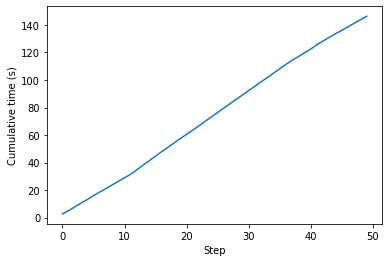

In [78]:
cum_times = np.cumsum(times)
plt.plot(cum_times)
plt.xlabel("Step")
plt.ylabel("Cumulative time (s)")
plt.show()

In [5]:
proc.sendline("exit");

NameError: name 'proc' is not defined

In [104]:
proc.sendline("exit");
# proc.kill(signal.SIGTERM)